# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

Version 2023.10.10.1.CT

## Background
(From https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions)
### 2023 Data Scientists Jobs Descriptions
This dataset was obtained from the Google Jobs API through serpAPI and contains information about job offers for data scientists in companies based in the United States of America (USA). The data may include details such as job title, company name, location, job description, salary range, and other relevant information. The dataset is likely to be valuable for individuals seeking to understand the job market for data scientists in the USA and for companies looking to recruit data scientists. It may also be useful for researchers who are interested in exploring trends and patterns in the job market for data scientists. The data should be used with caution, as the API source may not cover all job offers in the USA and the information provided by the companies may not always be accurate or up-to-date.

The goal of this homework assignment is to investigate those job descriptions.

The data file is available via https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions/download?datasetVersionNumber=1.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to 
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

Please fill in your uniqname in the next code cell:

In [1]:
MY_UNIQNAME = "prathuj"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import spacy
nlp = spacy.load('en_core_web_sm')

from tqdm import tqdm

#### Important Note
**You are not permitted to use additional packages beyond those that are already imported in the cell above, although you are welcome to import subpackages from the packages listed in the previous cell (e.g., `from spacy.lang.en.stop_words import STOP_WORDS` is fine, whereas `import fuzzywuzzy` or `from hyphenate import hyphenate_word` are not).**

## 1. What percentage of jobs include the phrase "data scientist" or "data science" in their title?  
Note that you will need to make (good) decisions about normalizing (i.e. converting to lowercase), how to handle "close" matches, etc. 
#

In [3]:
# read csv file into a pandas dataframe
jobs = pd.read_csv('Jobs.csv', index_col=0)
jobs.tail()

,title,company,announcement,description
785,Research and Data Specialist,GovernmentJobs.com,Learn4Good.com,"Description $3,000 hiring bonus to join the J..."
786,Quality Assurance Data Specialist,Metrocare Services,Glassdoor,Are you looking for a purpose-driven career? A...
787,Senior Data Analyst,Gopuff,Startup Jobs,The Senior Data Analyst will join as an analyt...
788,Cost Controller/Data Analyst,Petroplan,Petroplan,Overview: The Cost Controller / Data Analyst p...
789,Data Specialist,Hicuity Health,Monster,"Overview: Hicuity Health, the leading high ac..."


In [4]:
# insert your code here
# Data Science or Data Scientist in the title
pattern = r'(?i)data\s?(?:science|Scientist)'
jobs['ds_job'] = jobs['title'].str.contains(pattern, case=False)

# (?i) makes the pattern case-insensitive.
# data matches the word "data."
# \s? matches an optional space.
# (?:science|Scientist) matches either "science" or "Scientist."

# create a dataframe of value counts and percentages
ds_job_counts = jobs['ds_job'].value_counts().to_frame()
ds_job_counts.columns = ['counts']
ds_job_counts['percent'] = (ds_job_counts['counts']\
    / ds_job_counts['counts'].sum() * 100).round(2)
ds_job_counts

,counts,percent
ds_job,,
False,463,58.61
True,327,41.39


The percentage of jobs with 'data scientist' or 'data science' in their titles is: 41.39%. This makes 327 of the total 790 jobs.

In [5]:
ds_jobs = jobs[jobs['ds_job'] == True]
# ds_jobs

### 2. Create a visualization that shows the distribution of words counts of the descriptions. Omit stopwords. Describe what the visualization shows you. (Hint: a histogram is a good choice here.)

In [6]:
# import STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prathuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


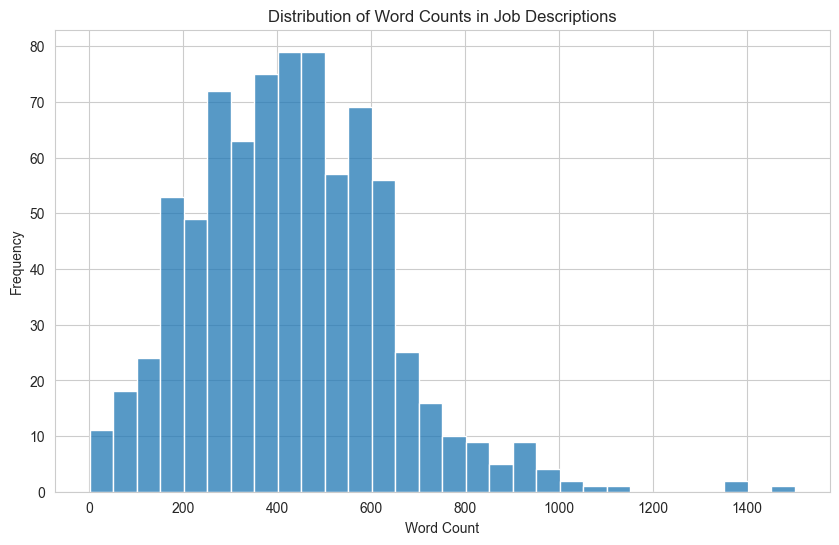

In [7]:
# count words in the description omit stop words
jobs['word_count_ns'] = jobs['description'].apply(
    lambda x: len([w for w in x.split() if w.lower() not in stop_words]))

# plot histogram of word counts
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(jobs['word_count_ns'], binwidth = 50, kde=False)
plt.title('Distribution of Word Counts in Job Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

- The count of words in the job description is a normal distribution skewed towards right.
- From the plot we can see that the median value is about 400 words per description.
- This shows that the description is mostly around 100 - 700 words in length.
- With very few descriptions being more than 1000 words.

### 3. Based on the descriptions, create a bar chart showing the top 10 tools used by data scientists.
Here is a list of tools to consider: Python, R, SQL, Jupyter, NumPy, Pandas, Matplotlib, Seaborn, SciPy, Scikit-Learn, TensorFlow, PyTorch, Keras, XGBoost, Plotly, Dask, Spark, Hadoop, AWS, Google Cloud, Azure, IBM Watson, NLTK, OpenCV, Gensim, StatsModels, Theano, Caffe, Bokeh, Folium, ggplot, Geopandas, Yellowbrick, Flask, Dash, Streamlit, FastAPI, PySpark, TensorBoard, NetworkX, BeautifulSoup, Scrapy, Numba, Cython, Git

Provide an interpretation of your bar chart -- what does it tell you?


In [8]:
skills = ['Python', r'(?<=\s)R(?![A-Za-z])', ' SQL', 'Jupyter', 'NumPy', 'Pandas',
        'Matplotlib', 'Seaborn', 'SciPy', 'Scikit-Learn', 'TensorFlow',
        'PyTorch', 'Keras', 'XGBoost', 'Plotly', 'Dask', 'Spark', 'Hadoop',
        'AWS', 'Google Cloud', 'Azure', 'IBM Watson', 'NLTK', 'OpenCV',
        'Gensim', 'StatsModels', 'Theano', 'Caffe', 'Bokeh', 'Folium',
        'ggplot', 'Geopandas', 'Yellowbrick', 'Flask', 'Dash', 'Streamlit',
        'FastAPI', 'PySpark', 'TensorBoard', 'NetworkX', 'BeautifulSoup',
        'Scrapy', 'Numba', 'Cython', ' Git']

c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


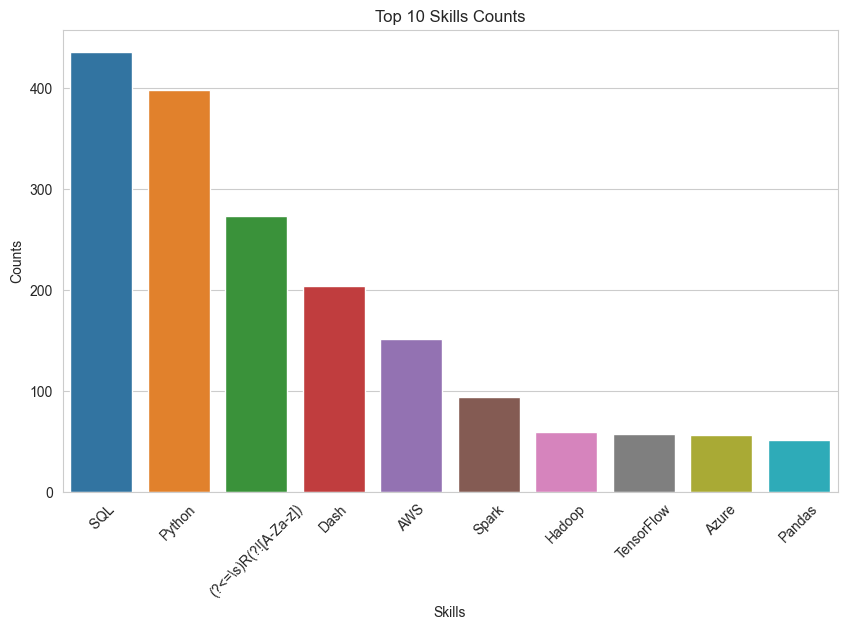

In [9]:
# insert your code here
# one hot encoding the skills in the description

for skill in skills:
    jobs[skill] = jobs['description'].str.contains(skill, case=False)

# create a dataframe of value counts and percentages
skill_counts = jobs[skills].sum().to_frame()
skill_counts.columns = ['counts']
# skill_counts

# plot the top 10 skills counts
top_10_skills = skill_counts.sort_values('counts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_skills.index, y=top_10_skills['counts'])
plt.title('Top 10 Skills Counts')
plt.xlabel('Skills')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [10]:
jobs[(jobs['description'].str.contains('SQL', case=False)) &
    (jobs[' SQL'] == False)]['description'][7]

'Company Description: HFR, Inc. (HFR) was founded in 1992 and specializes in the areas of hedge fund/alternative investment data collection, indexation and statistical analysis. HFR is the global leader for hedge fund benchmark indices.  Responsibilities: Member of the firm’s Index team, responsible for using a variety of advanced data techniques and designing predictive modeling processes to... develop new index methodologies and index families.  Duties include: • Research and development of new approaches to index construction and return analysis. • Assist with the construction, engineering and maintenance of portfolios of hedge funds for creation of strategy, sub-strategy, geographic & thematic index products • Gathering, cleaning, and processing raw data • Designing predictive models and machine learning algorithms to mine return data sets • Developing tools and processes to monitor, analyze and improve data accuracy • Building data visualization tools, dashboards, and reports • Wr

In [11]:
jobs[(jobs['description'].str.contains('Git', case=False)) &
    (jobs[' Git'] == False)]['description'][2]

"Discover. A brighter future.  With us, you’ll do meaningful work from Day 1. Our collaborative culture is built on three core behaviors: We Play to Win, We Get Better Every Day & We Succeed Together. And we mean it — we want you to grow and make a difference at one of the world's leading digital banking and payments companies. We value what makes you unique so that you have an opportunity to... shine.  Come build your future, while being the reason millions of people find a brighter financial future with Discover.  Job Description  At Discover, be part of a culture where diversity, teamwork and collaboration reign. Join a company that is just as employee-focused as it is on its customers and is consistently awarded for both. We’re all about people, and our employees are why Discover is a great place to work. Be the reason we help millions of consumers build a brighter financial future and achieve yours along the way with a rewarding career.  Responsible for working closely with manage

- Introduced space before ' SQL' to prevent occurence of skills like 'MySQL'
- Introduced space before ' Git' to prevent occurence of words like 'Digital'
- Used r'(?<=\s)R(?![A-Za-z])' to prevent considering words containing 'R'.

C:\Users\prathuj\AppData\Local\Temp\ipykernel_15836\3622080474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_jobs[skill] = ds_jobs['description'].str.contains(skill, case=False)
C:\Users\prathuj\AppData\Local\Temp\ipykernel_15836\3622080474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_jobs[skill] = ds_jobs['description'].str.contains(skill, case=False)
C:\Users\prathuj\AppData\Local\Temp\ipykernel_15836\3622080474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

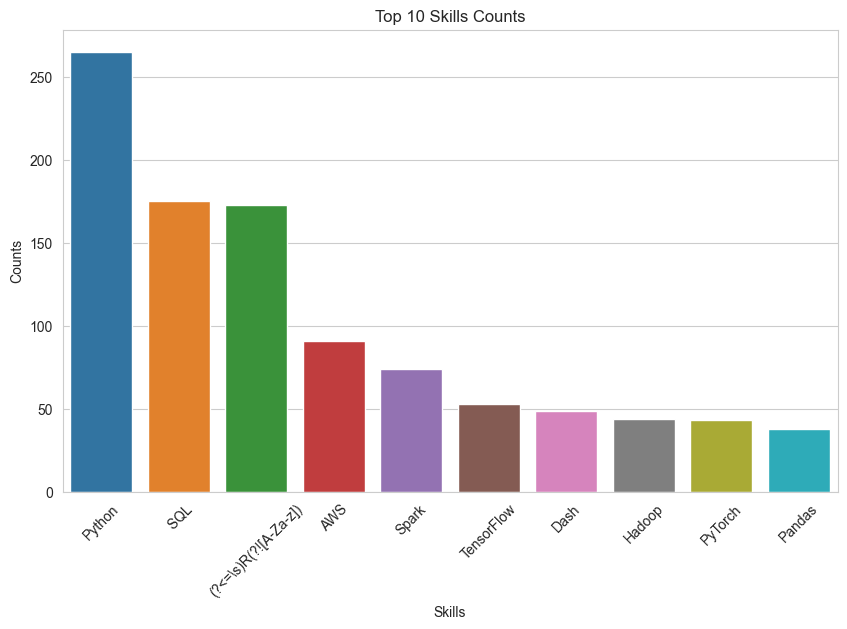

In [12]:
# insert your code here
# one hot encoding the skills in the description

for skill in skills:
    ds_jobs[skill] = ds_jobs['description'].str.contains(skill, case=False)

# create a dataframe of value counts and percentages
skill_counts = ds_jobs[skills].sum().to_frame()
skill_counts.columns = ['counts']
# skill_counts

# plot the top 10 skills counts
top_10_skills = skill_counts.sort_values('counts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_skills.index, y=top_10_skills['counts'])
plt.title('Top 10 Skills Counts')
plt.xlabel('Skills')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

- I have plotted both the skills for all the jobs overall, and also the subset of jobs that were specific for data scientists.
- We see that SQL, R and Python,the programming languages are the most sought after skills
- This is followed by AWS and big data tools like Spakr and Hadoop
- Other Deep Learning tools like Tensor Flow, Pytorch and Python tools like Pandas etc. are in top 10 most sought after tools.

### 4. Create a bar chart showing the number of postings for each of the following values of the number of years of experience required:
1. <2
2. 2-4
3. 5-9
4. 10+

You will need to try a number of different approaches to extracting this information from the `description` field.

c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


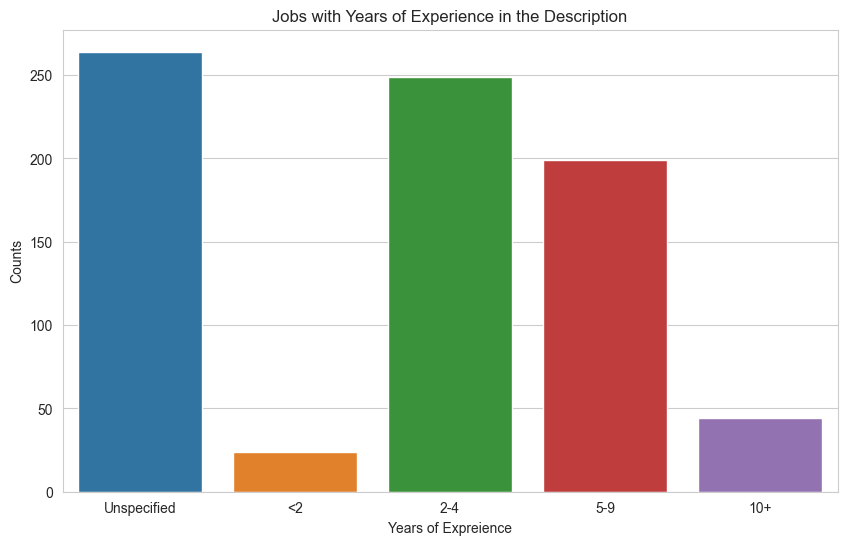

In [13]:
patterns = [r'(\d+\+? y)']

for pattern in patterns:
    jobs['years_exp'] = jobs['description'].str.extract(pattern)
    jobs['num_count'] = jobs['years_exp'].str.extract(r'(\d+)').astype(float)

# fill nan with 0
jobs['num_count'].fillna(0, inplace=True)
jobs['num_count'] = jobs['num_count'].astype(int)

# create bins
bins = [-1, 0, 1, 4, 9, 100]
labels = ['Unspecified', '<2', '2-4', '5-9', '10+']
jobs['num_count_bin'] = pd.cut(jobs['num_count'], bins=bins, labels=labels)

# bar plot of the number of jobs in each bin
plt.figure(figsize=(10, 6))
sns.countplot(x=jobs['num_count_bin'], order=labels)
plt.title('Jobs with Years of Experience in the Description')
plt.xlabel('Years of Expreience')
plt.ylabel('Counts')
plt.show()

- The patters that I have used to extract shall identify constructions of type
    - N years of expreience
    - N+ year
    - N yr
    - N+ yrs exp etc.
- This pattern was used to avoid considering random numbers like 30,000 or years like 2023 etc.
- We see that 2-4 years expreience of jobs are highest in demand, followed by 5-9 years of work experience.
- The tasks with unspecified work eperience may have resulted due to non-requirement of previous expreience, or the job description was not robust enough to convey the information.

### 5. What are the 5 most commonly used verbs in the job descriptions?
Is there a common theme? Are these the verbs that you would expect?

In [14]:
# create a dict for verbs and their counts
verb_counts = {}
for i in tqdm(range(len(jobs))):
    for token in nlp(jobs['description'][i]):
        # remove punctuation and symbols
        if token.is_punct or token.is_space or token.is_stop or token.is_digit:
            continue
        if token.pos_ == 'VERB':
            if token.lemma_ in verb_counts:
                verb_counts[token.lemma_] += 1
            else:
                verb_counts[token.lemma_] = 1

  0%|          | 0/790 [00:00<?, ?it/s]

100%|██████████| 790/790 [00:52<00:00, 15.18it/s]


In [15]:
# descending sort the dict for top 10 verbs
top_10_verbs = dict(sorted(verb_counts.items(), key=lambda item: item[1],
                           reverse=True)[:6])
top_10_verbs

{'work': 2140,
 'include': 1789,
 'provide': 1296,
 'develop': 1140,
 'require': 1085,
 'support': 888}

- As we expect, the list of job descriptions encompasses verbs like work, inlcude, provide, develop, require as the 5 top most occurring verbs.
- These verbs are more commonly used to set expectations of the employee, so the he is better able to understand the type of job / role he is to work in.

### 6. Based on the descriptions, what are the 3 most commonly mentioned organizations (hint: use Named Entity Recognition and look for ORG labels).
Do these results surprise you?  Why or why not?


In [16]:
job_descriptions = jobs['description']

def get_common_organizations(description):
    doc = nlp(description)
    orgs = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    return pd.Series(orgs).value_counts().head()

common_orgs = job_descriptions.apply(get_common_organizations).sum()\
    .sort_values(ascending=False).head()

print(common_orgs)

SQL               225.0
AI                 81.0
Data Science       70.0
Data Scientist     62.0
ML                 60.0
dtype: float64


C:\Users\prathuj\AppData\Local\Temp\ipykernel_15836\2427721315.py:8: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  common_orgs = job_descriptions.apply(get_common_organizations).sum()\


In Named Entity Recognition (NER), the labels assigned to entities such as "SQL," "AI," "Data Science," "Data Scientist," and "ML" as ORG (organization) might occur due to the context in which they are mentioned. While these terms are not typically considered organizations, NER models can sometimes misclassify them as organizations if they are used in a context that suggests an organizational affiliation.

For example, in job descriptions or contexts related to technology and data science, terms like "SQL" and "AI" may refer to specific technologies or tools used within an organization. Similarly, "Data Science," "Data Scientist," and "ML" can be associated with job titles or departments within organizations.

It's essential to note that NER models may not always accurately classify entities, and the context in which these terms appear plays a significant role in the labeling process. Adjusting the model or providing additional context can help improve the accuracy of NER classifications.

### Q7: Create a boxplot showing the distribution of the Flesch Reading Ease Score using all job descriptions

From https://readable.com/readability/flesch-reading-ease-flesch-kincaid-grade-level/

>The Flesch Reading Ease gives a text a score between 1 and 100, with 100 being the highest readability score. Scoring between 70 to 80 is equivalent to school grade level 8. This means text should be fairly easy for the average adult to read.
>The formula was developed in the 1940s by Rudolf Flesch. He was a consultant with the Associated Press, developing methods for improving the readability of newspapers.
>Now, over 70 years later, the Flesch Reading Ease is used by marketers, research communicators and policy writers, amongst many others. All use it to help them assess the ease by which a piece of text will be understood and engaged with.



Flesch Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
Here,

ASL = average sentence length (number of words divided by number of sentences)

ASW = average word length in syllables (number of syllables divided by number of words).

Please note that you will need to figure out how to handle non-sentences like bulleted lists.

Remember you are not permitted to import additional packages, so we recommend using the following starter code to count syllables.
```
def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count
```
Be sure to include an interpretation of what the boxplot tells you.

c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


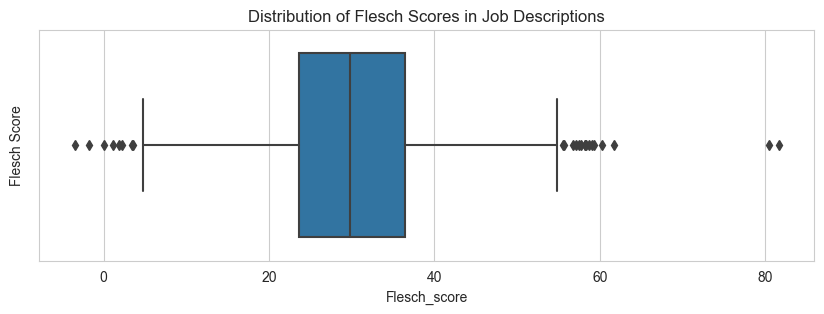

In [37]:
# insert your code here
# count words in the description
def word_count(text):
    return len([w for w in text.split()])

def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count

def sentence_count(text):
    text_arr = text.split('•')
    # split text arr
    text_arr = [text.split('.') for text in text_arr]
    # remove empty strings
    text_arr = [[text for text in text_arr if text != ''] for text_arr in text_arr]
    # flatten the list
    text_arr = [text for text_arr in text_arr for text in text_arr]
    # split text arr
    text_arr = [text.split('and') for text in text_arr]
    # remove empty strings
    text_arr = [[text for text in text_arr if text != ''] for text_arr in text_arr]
    # flatten the list
    text_arr = [text for text_arr in text_arr for text in text_arr]
    # split text arr
    text_arr = [text.split('or') for text in text_arr]
    # remove empty strings
    text_arr = [[text for text in text_arr if text != ''] for text_arr in text_arr]
    # flatten the list
    text_arr = [text for text_arr in text_arr for text in text_arr]
    
    return len(text_arr)

def Flesch_score(text):
    ASL = word_count(text)/sentence_count(text)
    ASW = syllables(text)/word_count(text)
    return 206.835 - 1.015*(ASL) - 84.6*(ASW)

jobs['ASW'] = jobs['description'].apply(lambda x: syllables(x)/word_count(x))
jobs['ASL'] = jobs['description'].apply(lambda x: word_count(x)/sentence_count(x))
jobs['Flesch_score'] = jobs['description'].apply(Flesch_score)

# boxplot of Flesch scores by data science job
plt.figure(figsize=(10, 3))
sns.boxplot(x=jobs['Flesch_score'])
plt.title('Distribution of Flesch Scores in Job Descriptions')
plt.ylabel('Flesch Score')
plt.show()

c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prathuj\OneDrive - Umich\@SI618\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

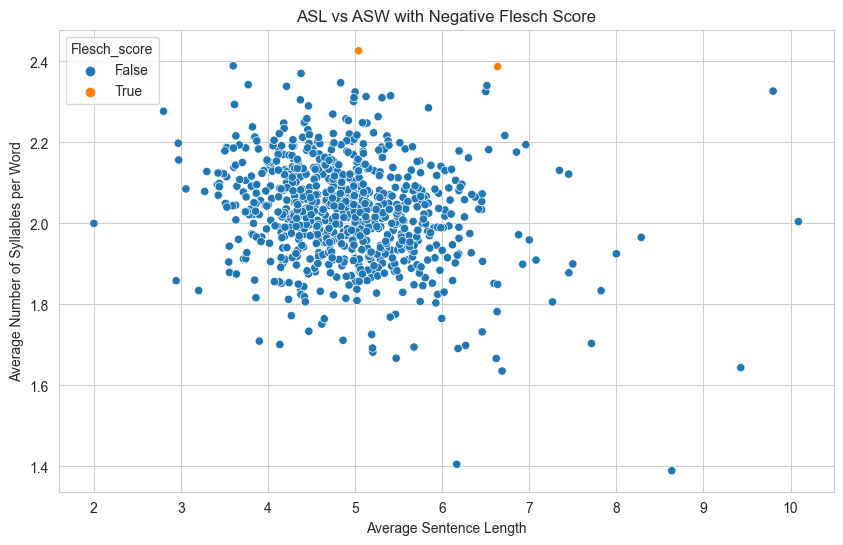

In [38]:
# plot ASL and ASW values with negative Flesch score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=jobs['ASL'], y=jobs['ASW'], hue=jobs['Flesch_score']<0)
plt.title('ASL vs ASW with Negative Flesch Score')
plt.xlabel('Average Sentence Length')
plt.ylabel('Average Number of Syllables per Word')
plt.show()


- From the box plot we can see that the Median Flesch score is around 25. This means that the text is difficult to read.
- We note that the Flesch score is also negative in some cases where the average sentence length is high and average syllables per word is also high.
- We could try to rectify these cases where ASL is too high by trimming the sentences at appropriate puncutation marks/ bullets.
- **Only 2 cases with negative Flesch score**

(Replace this with your description of what the visualization shows you.)

# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

In [19]:
jobs

,title,company,announcement,description,ds_job,word_count_ns,Python,(?<=\s)R(?![A-Za-z]),SQL,Jupyter,...,Scrapy,Numba,Cython,Git,years_exp,num_count,num_count_bin,ASW,ASL,Flesch_score
0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...,True,556,True,True,True,False,...,False,False,False,False,3 y,3,2-4,2.067004,27.275862,4.281479
1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...,True,529,True,False,True,False,...,False,False,False,False,4+ y,4,2-4,1.978616,19.875000,19.270932
2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ...",True,375,False,False,False,False,...,False,False,False,False,4+ y,4,2-4,2.107143,17.500000,10.808214
3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...,True,302,False,False,False,False,...,False,False,False,False,NaN,0,Unspecified,1.882729,39.083333,7.886525
4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla...",True,485,False,True,False,False,...,False,False,False,False,2 y,2,2-4,2.076369,19.277778,11.607249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,Research and Data Specialist,GovernmentJobs.com,Learn4Good.com,"Description $3,000 hiring bonus to join the J...",False,486,False,True,False,False,...,False,False,False,False,2 y,2,2-4,2.131503,15.377778,10.901411
786,Quality Assurance Data Specialist,Metrocare Services,Glassdoor,Are you looking for a purpose-driven career? A...,False,488,False,False,True,False,...,False,False,False,False,50 y,50,10+,2.083212,20.757576,9.526353
787,Senior Data Analyst,Gopuff,Startup Jobs,The Senior Data Analyst will join as an analyt...,False,368,True,False,True,False,...,False,False,False,False,3+ y,3,2-4,1.856881,23.695652,25.691803
788,Cost Controller/Data Analyst,Petroplan,Petroplan,Overview: The Cost Controller / Data Analyst p...,False,337,False,False,False,False,...,False,False,False,False,NaN,0,Unspecified,1.908222,24.904762,20.121103
